## -CPIAUCSL.csv - US CPI (inflation measure)
## -RRVRUSQ156N.csv - rental vacancy rate, quarterly
## -MORTGAGE30US.csv - mortgage interest rates, weekly
## -Metro_median_sale_price_uc_sfrcondo_week.csv - median sale price for US houses
## -Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv - Zillow home value index

In [1]:
import pandas as pd

fed_files = ["MORTGAGE30US.csv", "RRVRUSQ156N.csv", "CPIAUCSL.csv"]
# We are telling pandas parse any dates that find in csv file into pandas date time format.
dfs = [pd.read_csv(f, parse_dates=True, index_col=0) for f in fed_files]

In [2]:
dfs[0]

,MORTGAGE30US
DATE,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2022-07-14,5.51
2022-07-21,5.54
2022-07-28,5.30


In [3]:
dfs[1]

,RRVRUSQ156N
DATE,
1956-01-01,6.2
1956-04-01,5.9
1956-07-01,6.3
1956-10-01,5.8
1957-01-01,5.3
...,...
2021-04-01,6.2
2021-07-01,5.8
2021-10-01,5.6


In [4]:
dfs[2]

,CPIAUCSL
DATE,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2022-03-01,287.708
2022-04-01,288.663
2022-05-01,291.474


In [5]:
## We are using Concat function to combine them into one big dataframe
FED = pd.concat(dfs, axis =1)

In [6]:
FED

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1947-01-01,NaN,NaN,21.48
1947-02-01,NaN,NaN,21.62
1947-03-01,NaN,NaN,22.00
1947-04-01,NaN,NaN,22.00
1947-05-01,NaN,NaN,21.95
...,...,...,...
2022-07-14,5.51,NaN,NaN
2022-07-21,5.54,NaN,NaN
2022-07-28,5.30,NaN,NaN


In [7]:
## We dont get these values weekly thats why there are some missing values 
FED.tail(50)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2021-11-01,NaN,NaN,278.524
2021-11-04,3.09,NaN,NaN
2021-11-10,2.98,NaN,NaN
2021-11-18,3.10,NaN,NaN
2021-11-24,3.10,NaN,NaN
2021-12-01,NaN,NaN,280.126
2021-12-02,3.11,NaN,NaN
2021-12-09,3.10,NaN,NaN
2021-12-16,3.12,NaN,NaN


In [8]:
## We will assume that rates will stain constant for the period which they are released
FED = FED.ffill()

In [9]:
FED.tail(40)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2021-12-30,3.11,5.6,280.126
2022-01-01,3.11,5.8,281.933
2022-01-06,3.22,5.8,281.933
2022-01-13,3.45,5.8,281.933
2022-01-20,3.56,5.8,281.933
2022-01-27,3.55,5.8,281.933
2022-02-01,3.55,5.8,284.182
2022-02-03,3.55,5.8,284.182
2022-02-10,3.69,5.8,284.182


In [10]:
zillow_files = ["Metro_median_sale_price_uc_sfrcondo_week.csv", "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv"]

dfs = [pd.read_csv(f) for f in zillow_files]

In [11]:
dfs[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2022-05-07,2022-05-14,2022-05-21,2022-05-28,2022-06-04,2022-06-11,2022-06-18,2022-06-25,2022-07-02,2022-07-09
0,102001,0,United States,Country,NaN,190000.0,190000.0,193000.0,189900.0,194900.0,...,369900.0,370000.0,370000.0,375000.0,375000.0,370000.0,375000.0,370000.0,370000.0,362500.0
1,394913,1,"New York, NY",Msa,NY,400000.0,418250.0,420000.0,420000.0,400000.0,...,550000.0,555000.0,550000.0,575000.0,575000.0,578000.0,590000.0,582000.0,585000.0,595000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,497500.0,515000.0,520000.0,525000.0,498250.0,...,914000.0,925000.0,925000.0,951000.0,950000.0,920500.0,925000.0,900000.0,900500.0,906000.0
3,394463,3,"Chicago, IL",Msa,IL,245000.0,245000.0,251000.0,255000.0,255000.0,...,315000.0,310000.0,315500.0,315000.0,330000.0,324950.0,335000.0,325000.0,325000.0,315000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,144250.0,148900.0,139000.0,143700.0,145900.0,...,422000.0,430000.0,430000.0,425000.0,440000.0,425000.0,427750.0,426000.0,420000.0,420000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,394528,90,"Daytona Beach, FL",Msa,FL,NaN,170000.0,182400.0,170000.0,170000.0,...,340500.0,345000.0,327700.0,345000.0,350000.0,343250.0,359900.0,352000.0,336000.0,342990.0
80,394531,91,"Des Moines, IA",Msa,IA,138000.0,160000.0,150000.0,151750.0,154500.0,...,270000.0,285250.0,295000.0,273450.0,301000.0,290000.0,300900.0,281900.0,289250.0,280000.0
81,395006,100,"Provo, UT",Msa,UT,NaN,206000.0,215500.0,210000.0,210000.0,...,527000.0,540000.0,535000.0,552500.0,543750.0,571000.0,530300.0,569900.0,539950.0,572500.0
82,394549,104,"Durham, NC",Msa,NC,210000.0,170000.0,170500.0,197500.0,180000.0,...,456000.0,450000.0,428500.0,480000.0,465000.0,440000.0,450250.0,416000.0,465000.0,435250.0


In [12]:
## We want to take data only  for USA and we are gonna remove first five columns so we can have weekly sales columns
dfs =[pd.DataFrame(df.iloc[0,5:]) for df in dfs]

In [13]:
dfs[0]

,0
2008-02-02,190000.0
2008-02-09,190000.0
2008-02-16,193000.0
2008-02-23,189900.0
2008-03-01,194900.0
...,...
2022-06-11,370000.0
2022-06-18,375000.0
2022-06-25,370000.0
2022-07-02,370000.0


In [14]:
dfs[1]

,0
1996-01-31,108641.264685
1996-02-29,108472.72888
1996-03-31,108532.280074
1996-04-30,108739.077466
1996-05-31,108986.621607
...,...
2022-03-31,344042.433111
2022-04-30,350515.841789
2022-05-31,354717.722904
2022-06-30,357473.327397


# DATA MANIPULATION

In [15]:
## We need to add a column so we can merge them together, i removed days and left only month
for df in dfs:
    df.index = pd.to_datetime(df.index)
    df["Month"] = df.index.to_period("M")

In [16]:
dfs[1]

,0,Month
1996-01-31,108641.264685,1996-01
1996-02-29,108472.72888,1996-02
1996-03-31,108532.280074,1996-03
1996-04-30,108739.077466,1996-04
1996-05-31,108986.621607,1996-05
...,...,...
2022-03-31,344042.433111,2022-03
2022-04-30,350515.841789,2022-04
2022-05-31,354717.722904,2022-05
2022-06-30,357473.327397,2022-06


In [17]:
## Now we will combine them together 
Price_Data = dfs[0]. merge(dfs[1], on = "Month")

In [18]:
Price_Data.index = dfs[0].index


In [19]:
## 0_x Sales price, 0_y Average price
Price_Data

,0_x,Month,0_y
2008-02-02,190000.0,2008-02,206885.853266
2008-02-09,190000.0,2008-02,206885.853266
2008-02-16,193000.0,2008-02,206885.853266
2008-02-23,189900.0,2008-02,206885.853266
2008-03-01,194900.0,2008-03,205459.521952
...,...,...,...
2022-06-11,370000.0,2022-06,357473.327397
2022-06-18,375000.0,2022-06,357473.327397
2022-06-25,370000.0,2022-06,357473.327397
2022-07-02,370000.0,2022-07,357107.271636


In [20]:
del Price_Data ["Month"]
Price_Data.columns = ["Price", "Value"]

In [21]:
Price_Data

,Price,Value
2008-02-02,190000.0,206885.853266
2008-02-09,190000.0,206885.853266
2008-02-16,193000.0,206885.853266
2008-02-23,189900.0,206885.853266
2008-03-01,194900.0,205459.521952
...,...,...
2022-06-11,370000.0,357473.327397
2022-06-18,375000.0,357473.327397
2022-06-25,370000.0,357473.327397
2022-07-02,370000.0,357107.271636


In [22]:
## We need to merge zillow price data in with federal reserve economic data.
FED = FED.dropna()

In [23]:
FED

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-02,7.33,5.3,40.100
1971-04-09,7.31,5.3,40.100
1971-04-16,7.31,5.3,40.100
1971-04-23,7.31,5.3,40.100
1971-04-30,7.29,5.3,40.100
...,...,...,...
2022-07-14,5.51,5.6,295.271
2022-07-21,5.54,5.6,295.271
2022-07-28,5.30,5.6,295.271


In [24]:
FED.tail(20)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-04-21,5.11,5.6,288.663
2022-04-28,5.10,5.6,288.663
2022-05-01,5.10,5.6,291.474
2022-05-05,5.27,5.6,291.474
2022-05-12,5.30,5.6,291.474
2022-05-19,5.25,5.6,291.474
2022-05-26,5.10,5.6,291.474
2022-06-01,5.10,5.6,295.328
2022-06-02,5.09,5.6,295.328


In [25]:
## We need to align Fed data with zillow data so we will add couple of days before merge, it will shift 2 days forward
from datetime import timedelta
FED.index = FED.index + timedelta(days=2)

In [26]:
## Everytime shifted 2 days
FED

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-04,7.33,5.3,40.100
1971-04-11,7.31,5.3,40.100
1971-04-18,7.31,5.3,40.100
1971-04-25,7.31,5.3,40.100
1971-05-02,7.29,5.3,40.100
...,...,...,...
2022-07-16,5.51,5.6,295.271
2022-07-23,5.54,5.6,295.271
2022-07-30,5.30,5.6,295.271


In [27]:
Price_Data = FED.merge(Price_Data, left_index = True, right_index = True)

In [28]:
## We have a single data frame now
Price_Data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL,Price,Value
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952
...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,370000.0,357473.327397
2022-06-18,5.78,5.6,295.328,375000.0,357473.327397
2022-06-25,5.81,5.6,295.328,370000.0,357473.327397
2022-07-02,5.70,5.6,295.328,370000.0,357107.271636


In [29]:
Price_Data.columns = ["Interest", "Vacancy", "CPI", "Price" , "Value"]

In [30]:
Price_Data

,Interest,Vacancy,CPI,Price,Value
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952
...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,370000.0,357473.327397
2022-06-18,5.78,5.6,295.328,375000.0,357473.327397
2022-06-25,5.81,5.6,295.328,370000.0,357473.327397
2022-07-02,5.70,5.6,295.328,370000.0,357107.271636


# Data Exploration

<AxesSubplot:>

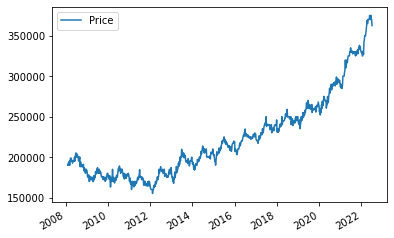

In [31]:
## House prices in USA over time. Inflation affects house price changes.
Price_Data.plot.line(y="Price", use_index = True)

In [32]:
## We wanna take out inflation, we just want to predict underline house prices.
Price_Data["Adjusted_Price"] = Price_Data["Price"] / Price_Data["CPI"] * 100

<AxesSubplot:>

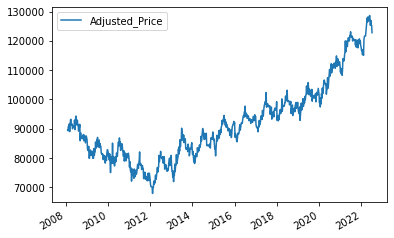

In [33]:
## We took inflation we only look here underlined house value change
Price_Data.plot.line(y="Adjusted_Price", use_index = True)

In [34]:
Price_Data["Adjusted_Value"] = Price_Data["Value"] / Price_Data["CPI"] * 100

In [35]:
## Now We will set up our ML to predict what will happen house prices next quarter. and drop missing values for training set.
## Shift is often used in time series analysis to create features that represent future or past values of a 
## variable for analysis or forecasting.
Price_Data["Next_Quarter"] = Price_Data["Adjusted_Price"].shift(-13)
Price_Data.dropna(inplace=True)
Price_Data

,Interest,Vacancy,CPI,Price,Value,Adjusted_Price,Adjusted_Value,Next_Quarter
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203
...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,125284.429516
2022-03-19,4.16,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,126977.462347
2022-03-26,4.42,5.8,287.708,355000.0,344042.433111,123388.991617,119580.419422,125284.429516
2022-04-02,4.67,5.8,287.708,360000.0,350515.841789,125126.864738,121830.412011,125284.429516


In [36]:
Price_Data["Change"] = (Price_Data["Next_Quarter"] > Price_Data["Adjusted_Price"]).astype(int)
## Is the price three months from now higher or lower than current price True=1 0=False

In [37]:
Price_Data

,Interest,Vacancy,CPI,Price,Value,Adjusted_Price,Adjusted_Value,Next_Quarter,Change
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498,1
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824,1
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229,1
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498,1
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203,1
...,...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,125284.429516,1
2022-03-19,4.16,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,126977.462347,1
2022-03-26,4.42,5.8,287.708,355000.0,344042.433111,123388.991617,119580.419422,125284.429516,1
2022-04-02,4.67,5.8,287.708,360000.0,350515.841789,125126.864738,121830.412011,125284.429516,1


In [38]:
Price_Data["Change"].value_counts()
## How many weeeks went up or went down

Change
1    379
0    343
Name: count, dtype: int64

In [40]:
Predictors = ["Interest", "Vacancy", "Adjusted_Price", "Adjusted_Value"]
Target = "Change"

# Machine Learning Part

In [43]:
## It is robust well overfitting for basic models and pick up non linear tendencies data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ##What percentage of time our model is correct
import numpy as np


In [45]:
## random state 1 = every time you run your model it will generat same random numbers and same result

START = 260 # Five years worth of data
STEP = 52  # A year week

def predict(train, test, predictors, target):
    rf = RandomForestClassifier(min_samples_split=10, random_state=1) ##Min Sample split protects from overfitting, 
    rf.fit(train[predictors], train[target])
    Predictions = rf.predict(test[predictors])
    return Predictions


## Generate predictions for most of our dataset but do it in a way that respects the order of the data set so we avoid just 
## using future data to predict the the past. It will start from 2008 to 2013 and will make predictions for 2014.
def backtest(data, predictors, target):
    all_preds = []
    for i in range(START, data.shape[0], STEP):
        train = Price_Data.iloc[:i]
        test = Price_Data.iloc[i:(i+STEP)]
        all_preds.append(predict(train, test, predictors, target))
    
    Predictions = np.concatenate(all_preds)
    return Predictions, accuracy_score(data.iloc[START:][target], Predictions)

## Measuring Error


In [48]:
preds, accuracy = backtest(Price_Data, Predictors, Target)

In [49]:
## That Means when model makes a prediction it is correct 59 percent of time. Lets improve it for better accuracy.
accuracy

0.5952380952380952

In [51]:
## We need more variables into model and we will use those variables to actually give the model extra information and it will
## be about recent trend in house prices between the ratio and current sales price the current interest rates etc and the 
## average during the past year thats why we will use rolling. Min periods prevent returning na if there is under 52 week
Yearly = Price_Data.rolling(52, min_periods=1).mean()

In [52]:
yearly_ratios = [p + "_year" for p in Predictors]
Price_Data[yearly_ratios] = Price_Data[Predictors] / Yearly[Predictors]

In [53]:
Price_Data

,Interest,Vacancy,CPI,Price,Value,Adjusted_Price,Adjusted_Value,Next_Quarter,Change,Interest_year,Vacancy_year,Adjusted_Price_year,Adjusted_Value_year
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498,1,1.000000,1.000000,1.0,1.0
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824,1,0.999119,1.000000,0.998793,0.998793
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229,1,1.005272,1.000000,1.009662,0.999195
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498,1,1.045435,1.000000,0.995075,0.999396
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203,1,1.063032,1.000000,1.016948,0.993996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,125284.429516,1,1.235955,0.977317,1.021141,1.049231
2022-03-19,4.16,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,126977.462347,1,1.326140,0.980494,1.019749,1.047093
2022-03-26,4.42,5.8,287.708,355000.0,344042.433111,123388.991617,119580.419422,125284.429516,1,1.397289,0.983692,1.03262,1.044965
2022-04-02,4.67,5.8,287.708,360000.0,350515.841789,125126.864738,121830.412011,125284.429516,1,1.462275,0.986911,1.045474,1.062065


In [56]:
preds, accuracy = backtest(Price_Data, Predictors + yearly_ratios, Target) 
## We seeee that we improved the accuracy adding in these ratios has given the algorithm good information that it
## can use to make better decisions.


In [57]:
accuracy

0.6536796536796536

In [62]:
## We are doing some diagnostics so we can plot out where the algorithm is making mistakes in its predictions 
pred_match = (preds == Price_Data[Target].iloc[START:]) ## This is comparing our predicted values to the actual values.
pred_match[pred_match == True] = "green"    ## When we made an correct prediction green
pred_match[pred_match == False] = "orange" ## When we made an incorrect prediction orange

<AxesSubplot:xlabel='index', ylabel='Adjusted_Price'>

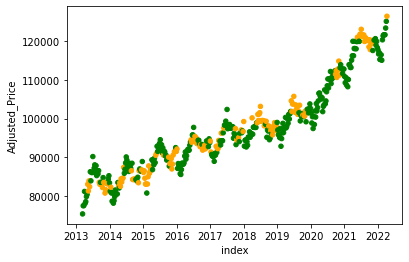

In [63]:
import matplotlib.pyplot as plt

plot_data = Price_Data.iloc[START:].copy() ##Copying actual values 

plot_data.reset_index().plot.scatter(x="index", y="Adjusted_Price", color=pred_match) 

## The model recently has not been doing as well when the market was going up but shifts suddenly to going down. So This can tell us maybe adding in some predictors or data sets that explain when the market is about to shift like maybe news articles or other economic data sets could actually help improve this model.

In [64]:
## Checking which columns are actually most important to the model so i can find out which columns i can drop.
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(min_samples_split=10, random_state=1)
rf.fit(Price_Data[Predictors], Price_Data[Target])

result = permutation_importance(rf, Price_Data[Predictors], Price_Data[Target], n_repeats=10, random_state=1)

In [65]:
## How Important each variable was to our model
result["importances_mean"]

array([0.17451524, 0.15540166, 0.27576177, 0.34861496])

In [67]:
Predictors


['Interest', 'Vacancy', 'Adjusted_Price', 'Adjusted_Value']

## To Improve model We can add more economic indicators like stock market indicators, gold or other assests that may or may not be correlated with house prices.